<a href="https://colab.research.google.com/github/ItsYourNafiz/Image-Classification---CNN/blob/main/Cat_%26_Dog_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Link : https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:52<00:00, 22.5MB/s]
100% 1.06G/1.06G [00:52<00:00, 22.0MB/s]


In [ ]:
import zipfile

In [ ]:
# !unzip path_to_file.zip -d path_to_directory (Extract to a directory)
# !unzip "/content/drive/path/input_file_name.zip" -d "/content/drive/path/output_folder/"

!unzip /content/dogs-vs-cats.zip

In [ ]:
#Importing Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras_preprocessing.image import img_to_array, array_to_img    #instead of keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical



In [ ]:
# To Consume Time We Should Process Whole Image Data into bunch of Batches So that we can easily workthrough Batches
train_dset = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = "inferred",
    label_mode = "int",
    image_size = (256, 256),
    batch_size = 32     
)

validation_dset = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = "inferred",
    label_mode = "int",
    image_size = (256, 256),
    batch_size = 32     
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize Dataset

def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_dset = train_dset.map(process)
validation_dset = validation_dset.map(process)

In [ ]:
# Create CNN Model

model = Sequential()

# 1st Conv Layer
model.add(Conv2D(32, kernel_size=(3,3), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding="valid"))

# 2nd Conv Layer
model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

# 3rd Conv Layer
model.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

# 4th Conv Layer
model.add(Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 127, 127, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
#Compile Model

model.compile(loss = "binary_crossentropy",
              optimizer=Adam(0.001),
              metrics=["accuracy"])

In [ ]:
# Fit Model

history = model.fit(train_dset,
                    epochs=20,
                    batch_size = 128,
                    validation_data = validation_dset)

Epoch 1/20
625/625 [==============================] - 88s 123ms/step - loss: 0.6509 - accuracy: 0.6879 - val_loss: 0.6619 - val_accuracy: 0.6402
Epoch 2/20
625/625 [==============================] - 77s 122ms/step - loss: 0.4274 - accuracy: 0.8038 - val_loss: 0.4899 - val_accuracy: 0.7890
Epoch 3/20
625/625 [==============================] - 77s 123ms/step - loss: 0.3380 - accuracy: 0.8539 - val_loss: 0.4437 - val_accuracy: 0.8018
Epoch 4/20
625/625 [==============================] - 77s 123ms/step - loss: 0.2705 - accuracy: 0.8831 - val_loss: 0.3503 - val_accuracy: 0.8648
Epoch 5/20
625/625 [==============================] - 77s 122ms/step - loss: 0.2118 - accuracy: 0.9117 - val_loss: 0.3657 - val_accuracy: 0.8616
Epoch 6/20
625/625 [==============================] - 77s 122ms/step - loss: 0.1653 - accuracy: 0.9328 - val_loss: 0.6537 - val_accuracy: 0.8084
Epoch 7/20
625/625 [==============================] - 77s 122ms/step - loss: 0.1256 - accuracy: 0.9492 - val_loss: 0.6600 - val_ac

In [ ]:
#Save The Model

model.save("/content/drive/MyDrive/Cat_Dog_Classification/cat_dog_classification.h5")

#Serialize Model to JSON
json_model = model.to_json()

#Save the Model Architecture to JSON File
with open('/content/drive/MyDrive/Cat_Dog_Classification/cat_dog_classification_model.json', 'w') as json_file:
  json_file.write(json_model)

#Saving the Weights of the Model
model.save_weights("/content/drive/MyDrive/Cat_Dog_Classification/cat_dog_classification_weights.h5")

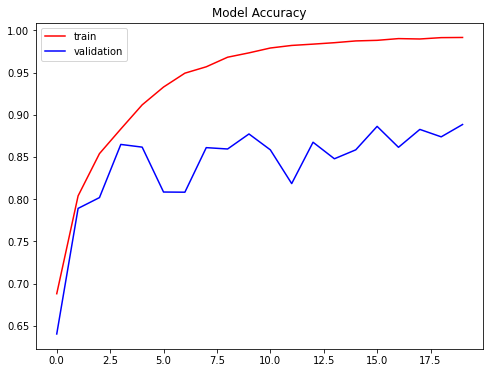

In [ ]:
#Accuracy Plot

plt.figure(figsize=(8,6))
plt.plot(history.history["accuracy"], color = "red", label = "train")
plt.plot(history.history["val_accuracy"], color = "blue", label = "validation")
plt.title("Model Accuracy")
plt.legend()
plt.show()

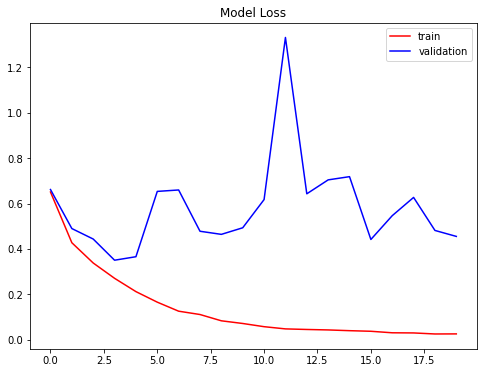

In [ ]:
#Plot Loss

plt.figure(figsize=(8,6))
plt.plot(history.history["loss"], color = "red", label = "train")
plt.plot(history.history["val_loss"], color = "blue", label = "validation")
plt.title("Model Loss")
plt.legend()
plt.show()

In [ ]:
print("[INFO] Calcuating Model Accuracy")
scores = model.evaluate(train_dset)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calcuating Model Accuracy
625/625 [==============================] - 38s 61ms/step - loss: 0.0405 - accuracy: 0.9864
Test Accuracy: 98.64000082015991


Try on Real Image

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
testImg_dog = cv2.imread("/content/dogg.jpg")
testImg_cat = cv2.imread("/content/Cat.webp")

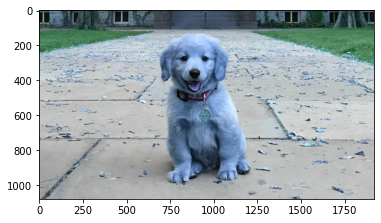

In [ ]:
plt.imshow(testImg_dog)

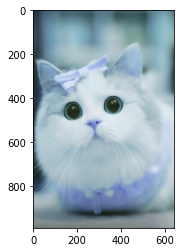

In [ ]:
plt.imshow(testImg_cat)

In [ ]:
testImg_dog.shape

(1080, 1920, 3)

In [ ]:
testImg_cat.shape

(991, 640, 3)

In [ ]:
#Resizing Image

resized_dog = cv2.resize(testImg_dog, (256, 256))
resized_cat = cv2.resize(testImg_cat, (256, 256))

In [ ]:
input_dog = resized_dog.reshape((1, 256, 256, 3))
input_cat = resized_cat.reshape((1, 256, 256, 3))

**If Dog Image as input, it will output 0
&
If Cat Image as input, it will output 1 **

In [ ]:
model.predict(input_dog)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)

In [ ]:
model.predict(input_cat)

1/1 [==============================] - 0s 25ms/step


array([[1.]], dtype=float32)